In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

standardScaler = joblib.load('../pipeline/StandardScalerPipeline.pkl')

In [2]:
X = pd.read_csv('../dataset/X.csv')
y = pd.read_csv('../dataset/y.csv')

In [3]:
X.head()

,Size,Bedrooms,Bathrooms,Lat,Long,Amenities_Score,BedtoBath_Ratio,Furnished,Apartment,Duplex,Penthouse,Room,Studio,TotalRooms,Level_category,accessibility_score
0,165,3,3,30.093319,31.637916,8,1.000000,1,1,0,0,0,0,6,0,0
1,225,3,3,30.023628,31.304425,5,1.000000,1,1,0,0,0,0,6,0,0
2,280,4,3,30.052118,31.342205,7,0.750000,0,1,0,0,0,0,7,0,0
3,120,3,2,30.052118,31.342205,6,0.666667,1,1,0,0,0,0,5,0,0
4,197,3,3,30.051086,31.537079,8,1.000000,0,1,0,0,0,0,6,0,0


In [4]:
y = np.array(y).ravel()
y[:5]

array([35000, 77000, 30000,  1500, 22000], dtype=int64)

In [5]:
stdX = standardScaler.transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.1, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9548, 16)
(9548,)
(1061, 16)
(1061,)


In [8]:
def print_metrics(y_true, preds):
    mae = mean_absolute_error(y_true, preds)
    mse = mean_squared_error(y_true, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, preds)
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('R2:', r2, '\n')

def cv_evaluate(model):
    # Check CV Scores
    scores = cross_val_score(model, X_train, y_train, cv=5)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    print('Cross Validation Scores:')
    print(f'CV_scores = {scores}')
    print('CV mean:', "{:.4f}".format(np.mean(scores)))
    print('CV Std:', "{:.4f}".format(np.std(scores)), '\n')

    # print Accuracy Scores
    print("Train Scores:")
    print_metrics(y_train, train_preds)
    print("Test Scores:")
    print_metrics(y_test, test_preds)


## Linear Regression

In [9]:
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train, y_train)
cv_evaluate(lr_model_1)

Cross Validation Scores:
CV_scores = [0.3578501  0.39351357 0.387805   0.37713247 0.37051981]
CV mean: 0.3774
CV Std: 0.0126 

Train Scores:
MAE: 8027.602953498114
RMSE: 11435.137625976848
R2: 0.380154055556314 

Test Scores:
MAE: 7883.37794533459
RMSE: 11071.525312891881
R2: 0.38149659138851166 



In [10]:
lr_model_2 = LinearRegression()
poly_2 = PolynomialFeatures(degree=2)
X_train_2 = poly_2.fit_transform(X_train)
X_test_2 = poly_2.fit_transform(X_test)

In [11]:
scores = cross_val_score(lr_model_2, X_train, y_train, cv=5)
print(f'CV_scores = {scores}')
print('CV mean:', "{:.4f}".format(np.mean(scores)))
print('CV Std:', "{:.4f}".format(np.std(scores)))

CV_scores = [0.3578501  0.39351357 0.387805   0.37713247 0.37051981]
CV mean: 0.3774
CV Std: 0.0126


## Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.1, random_state=42)

In [14]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    bootstrap=True,
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [15]:
cv_evaluate(rf_model)

Cross Validation Scores:
CV_scores = [0.62666695 0.62243989 0.64285889 0.64169645 0.62243101]
CV mean: 0.6312
CV Std: 0.0092 

Train Scores:
MAE: 4482.920137667714
RMSE: 6868.109956861298
R2: 0.7763981196870807 

Test Scores:
MAE: 5515.289442212754
RMSE: 8593.873711437429
R2: 0.6273465746873996 



## Extreme Gradient Boosting (XGBoost)

In [16]:
from xgboost import XGBRegressor

In [17]:
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.1, random_state=42)

In [18]:
xgb_model = XGBRegressor(
    learning_rate=0.01,  
    n_estimators=200,
    max_depth=3,
    min_child_weight=3,
    gamma=10,
    subsample = 0.8, 
    colsample_bytree = 0.4, 
    reg_alpha=0
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
cv_evaluate(xgb_model)

Cross Validation Scores:
CV_scores = [0.39547713 0.39790721 0.44954725 0.39612102 0.39941074]
CV mean: 0.4077
CV Std: 0.0210 

Train Scores:
MAE: 7425.634179002229
RMSE: 11067.525187375591
R2: 0.41936660531128434 

Test Scores:
MAE: 7235.837001962329
RMSE: 10867.309260335722
R2: 0.4041029500343073 



## Support Vector Regressor (SVR)

In [20]:
from sklearn.svm import SVR

In [21]:
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.1, random_state=42)

In [22]:
svr_model = SVR(C=1.0, epsilon=0.2)
svr_model.fit(X_train, y_train)

SVR(epsilon=0.2)

In [23]:
cv_evaluate(svr_model)

Cross Validation Scores:
CV_scores = [-0.03955444 -0.03894751 -0.02831072 -0.04670525 -0.02864701]
CV mean: -0.0364
CV Std: 0.0070 

Train Scores:
MAE: 10469.3759719012
RMSE: 14751.236923363153
R2: -0.031472963810776244 

Test Scores:
MAE: 10116.918912142755
RMSE: 14272.652771986974
R2: -0.02786619596931028 



In [93]:
models_dict = {
    'Linear Regression': lr_model_1,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'SVR': svr_model
}

metrics_dict = {}
for name, model in models_dict.items():
    preds = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)

    metrics_dict[name] = np.array([score, mae, np.sqrt(mse)])

metrics_df = pd.DataFrame(metrics_dict, index=['score', 'MAE', 'RMSE'])

In [94]:
metrics_df

,Linear Regression,Random Forest,XGBoost,SVR
score,0.381497,0.627347,0.404103,-0.027866
MAE,7883.377945,5515.289442,7235.837002,10116.918912
RMSE,11071.525313,8593.873711,10867.309260,14272.652772


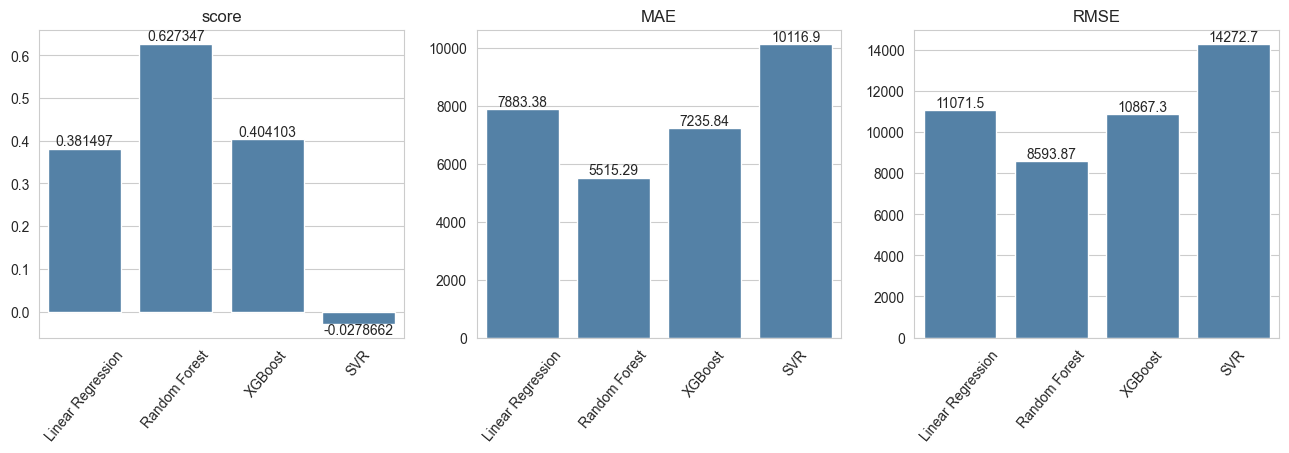

In [97]:
plt.figure(figsize=(16,4))
for i, col in enumerate(['score', 'MAE', 'RMSE']):
    plt.subplot(1, 3, i+1)
    sns.set_style('whitegrid')
    ax = sns.barplot(data=metrics_df.T, x=metrics_df.T.index, y=col, color='steelblue')
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.ylabel('')
    plt.xticks(rotation=50.2)
    plt.title(f'{col}')

## Conclusion
- Obviously the best model score is Random Forest with score almost 63%.
- The lowest MAE and RMSE is Random Forest.
- Therefor,  selected model is Random Forest model.